# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Frederick Rianto Putra]
- **Email:** [m120d4ky2060@bangkit.academy]
- **ID Dicoding:** [frederickriantop]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Bagaimana pola peminjaman sepeda berubah sepanjang hari dan apakah pola ini berbeda antara hari kerja dan hari libur?
- Pertanyaan 2 = Apakah terdapat hubungan antara kondisi cuaca dan jumlah peminjaman sepeda?
- Pertanyaan 3 = Bagaimana pola peminjaman sepeda berbeda berdasarkan jam dalam 1 minggu?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Menilai Tabel day_rental_df

In [3]:
day_rental_df = pd.read_csv("/content/day.csv")
day_rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_rental_df = pd.read_csv("/content/hour.csv")
hour_rental_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_rental_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_rental_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel hour_rental_df

In [11]:
hour_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_rental_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", hour_rental_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
hour_rental_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning `day_rental_df`

In [19]:
day_rental_df['dteday'] = pd.to_datetime(day_rental_df['dteday'])

In [50]:
day_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  day_type    731 non-null  

#### Cleaning `hour_rental_df`

In [20]:
hour_rental_df['dteday'] = pd.to_datetime(day_rental_df['dteday'])

In [51]:
hour_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   dteday               731 non-null    datetime64[ns]
 2   season               17379 non-null  int64         
 3   yr                   17379 non-null  int64         
 4   mnth                 17379 non-null  int64         
 5   hr                   17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  object        
 10  temp                 17379 non-null  float64       
 11  atemp                17379 non-null  float64       
 12  hum                  17379 non-null  float64       
 13  windspeed            17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_rental_df`

In [29]:
day_rental_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
288,289,2011-10-16,4,0,10,0,0,0,1,0.511667,0.503154,0.486667,0.281717,1748,3293,5041,working day
571,572,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173,working day
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,working day
677,678,2012-11-08,4,1,11,0,4,1,1,0.352174,0.341891,0.333478,0.347835,340,4975,5315,working day
270,271,2011-09-28,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427,3907,working day


In [30]:
day_rental_df.describe(include="all")

<ipython-input-30-7f5141e9b78f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_rental_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,working day
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN


In [36]:
workingday_counts = day_rental_df.groupby('workingday').size()
workingday_counts

workingday
0    231
1    500
dtype: int64

In [37]:
holiday_counts = day_rental_df.groupby('holiday').size()
holiday_counts

holiday
0    710
1     21
dtype: int64

### Explore `hour_rental_df`

In [38]:
hour_rental_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_desc
16042,16043,NaT,4,1,11,3,0,2,1,1,0.22,0.2424,0.64,0.1045,0,4,4,Clear
1681,1682,NaT,1,0,3,16,0,2,1,2,0.38,0.3939,0.46,0.3284,21,93,114,Mist
7206,7207,NaT,4,0,11,21,0,2,1,1,0.36,0.3788,0.81,0.0000,13,114,127,Clear
8962,8963,NaT,1,1,1,7,0,6,0,1,0.14,0.1515,0.50,0.1343,0,24,24,Clear
1739,1740,NaT,1,0,3,3,0,5,1,1,0.36,0.3485,0.71,0.1940,1,4,5,Clear


In [39]:
hour_rental_df.describe(include="all")

<ipython-input-39-f4591ddb8e34>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_rental_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_desc
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN


In [47]:
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
hour_rental_df['weathersit'] = hour_rental_df['weathersit'].map(weather_mapping)
total_count_by_weather = hour_rental_df.groupby('weathersit')['cnt'].sum()
print(total_count_by_weather)

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            2338173
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     223
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     158331
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                795952
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

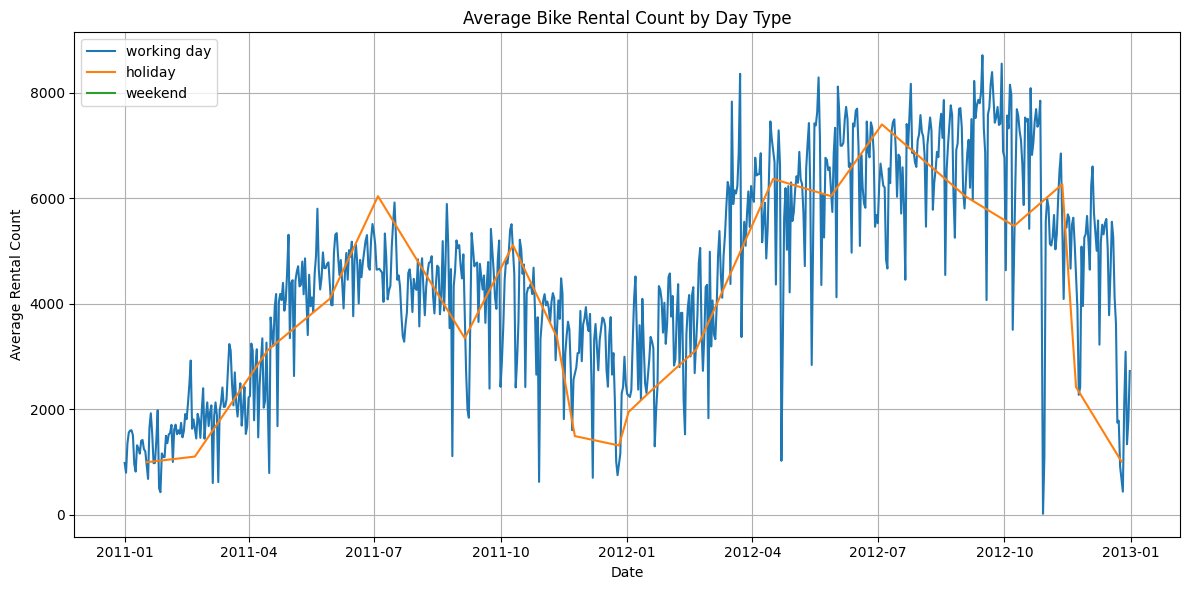

In [17]:
day_rental_df['day_type'] = day_rental_df['holiday'].apply(lambda x: 'holiday' if x == 1 else ('working day' if x == 0 else 'weekend'))
day_rental_df_grouped = day_rental_df.groupby(['dteday', 'day_type']).agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))

for day_type in ['working day', 'holiday', 'weekend']:
    data = day_rental_df_grouped[day_rental_df_grouped['day_type'] == day_type]
    plt.plot(data['dteday'], data['cnt'], label=day_type)

plt.title('Average Bike Rental Count by Day Type')
plt.xlabel('Date')
plt.ylabel('Average Rental Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

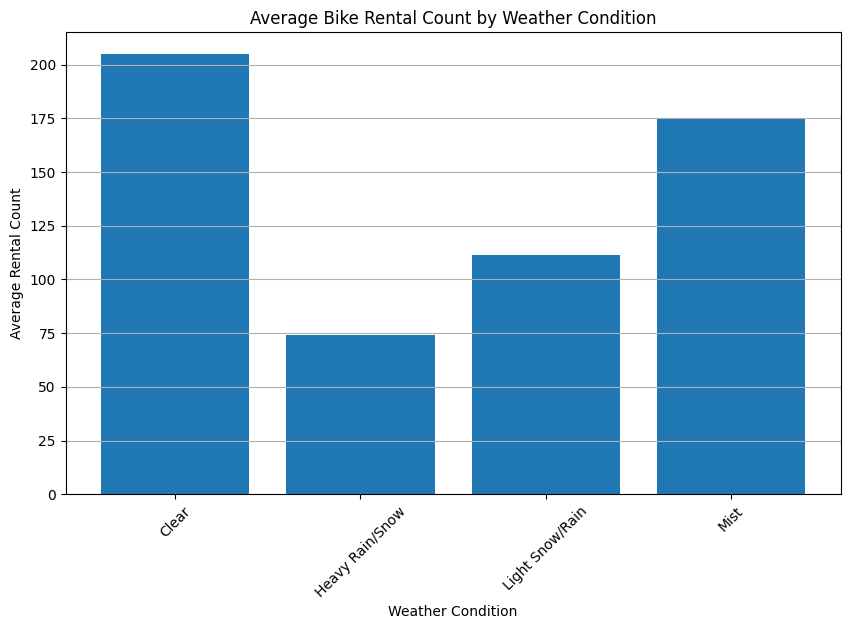

In [18]:
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
hour_rental_df['weather_desc'] = hour_rental_df['weathersit'].map(weather_mapping)
weather_data_grouped = hour_rental_df.groupby('weather_desc').agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(weather_data_grouped['weather_desc'], weather_data_grouped['cnt'])
plt.title('Average Bike Rental Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rental Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Pertanyaan 3:

<ipython-input-49-941fd4e2ca0c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hourly_data_pivot = hourly_data_grouped.pivot("hr", "weekday", "cnt")


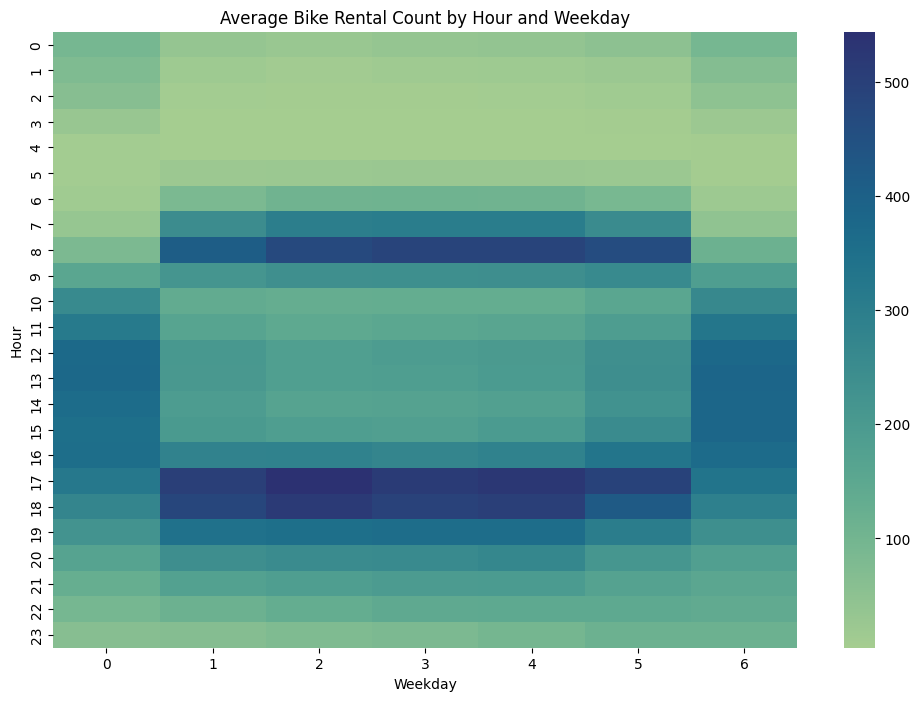

In [49]:
hourly_data_grouped = hour_rental_df.groupby(['hr', 'weekday']).agg({'cnt': 'mean'}).reset_index()
hourly_data_pivot = hourly_data_grouped.pivot("hr", "weekday", "cnt")
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_data_pivot, cmap="crest")
plt.title('Average Bike Rental Count by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.show()

## Conclusion

- Conclution pertanyaan 1

  terdapat perbedaan pola peminjaman antara hari kerja dan hari libur, dan ada beberapa faktor-faktor yang mempengaruhi pola tersebut. dan didapatkan bahwa pada 2012-1 hingga 2012-10 terdapat kenaikan signifikan.

- Conclution pertanyaan 2
  
  saya menggunakan grafik batang untuk memvisualisasikan hubungan antara situasi cuaca dan jumlah rata-rata peminjaman sepeda. dimana didapatkan kesimpulan bahwa pesepada banyak terdapat pada cuaca clear dan paling sedikit pada heavy rain/snow

- Conclution pertanyaan 3
  
  saya menggunakan heatmap untuk memvisualisasikan pola peminjaman sepeda berdasarkan jam dan hari dalam seminggu. Ini akan membantu kita melihat bagaimana pola peminjaman berubah sepanjang hari dan selama minggu. dan didapatkan bahwa rata-rata jam penggunaan sepeda terdapat pada jam 7-8 dan 17-18
